# Is Fandango Still Inflating Ratings

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest ([Fandango](https://www.fandango.com/) is an online movie ratings aggregator). He published his analysis [in this article](https://fivethirtyeight.com/features/fandango-movies-ratings/).

Fandango's officials said that this was due to a bug in their system, and that they would fix the bug.

In this project, we are going to analyze recent movie ratings data to determine if they fixed the bug since Walt Hickey's analysis.

In [1]:
import pandas as pd
prev = pd.read_csv('fandango_score_comparison.csv')
after = pd.read_csv('movie_ratings_16_17.csv')

fand_prev = prev[[
    'FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference'
]].copy()

fand_after = after[['movie', 'year', 'fandango']].copy()

fand_after.head(10)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0
6,A Street Cat Named Bob,2016,4.5
7,Alice Through the Looking Glass,2016,4.0
8,Allied,2016,4.0
9,Amateur Night,2016,3.5


# Population of Interest
The population we would like to describe is all of the available ratings that fandango displays on their website, regardless of when the film was released. As stated earlier, our goal is to see if Fandango fixed the "bug" that biased their movie ratings, making their distribution even more left-skewed, inflating their ratings of movies.

Unfortunately, the samples that we have, Hickey's original dataset and our 2016-2017 dataset, are not entirely likely to be representative of our population; our datasets filter out based on ratings and ticket sales or release date and votes respectively. A later analysis might involve re-sampling the data, though that may be impossible since Fandango "fixed" the availability of some of the data originally sampled in 2015 by Hickey. For now, we'll change the goal of our analysis based on the data available.

Our new goal will be to compare popular movies from 2015 with 2016 to see if the displayed ratings of movies on the site are still as left-skewed. Our population will end up being limited to movies which were released close to the date of Hickey's original analysis and are filtered out based on engagement on the Fandango site—which is a good proxy for our initial goal. Now the data we have is the representative population of our new, changed goal.

# Refining our Populations
Now we have two data sets

All Fandango's ratings for "popular" movies released in 2015.
All Fandango's ratings for "popular" movies released in 2016.
For the purpose of this notebook, we'll use Hickey's benchmark of 30 fan ratings and count a movie as popular only if it has 30 fan ratings or more on Fandango's website.

Unfortunately, our second data set doesn't have fan ratings. We should be skeptical once more and ask whether it is truly representative and contains popular movies (movies with over 30 fan ratings).

To evaluate whether or not it is representative, we will use sampling techniques, randomly sampling 10 movies from our second data set and checking the number of fan ratings on Fandango's website. We'll say that it is representative if 8 out of the 10 randomly sampled movies match our criteria of 30 fan ratings or more.

In [2]:
fand_after.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Unfortunately, our dataset doesn'y contain this info, and we'd prefer to check ourselves, but the Fandango website is very unclear about this information. Luckily the [dataquest.io github](https://github.com/dataquestio/solutions/blob/master/Mission288Solutions.ipynb) has a table containing the desired info as of 2018:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-baqh{text-align:center;vertical-align:top}
.tg .tg-amwm{font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-yw4l{vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-amwm">Movie</th>
    <th class="tg-amwm">Fan ratings</th>
  </tr>
  <tr>
    <td class="tg-baqh">Mechanic: Resurrection</td>
    <td class="tg-baqh">2247</td>
  </tr>
  <tr>
    <td class="tg-baqh">Warcraft</td>
    <td class="tg-baqh">7271</td>
  </tr>
  <tr>
    <td class="tg-baqh">Max Steel</td>
    <td class="tg-baqh">493</td>
  </tr>
  <tr>
    <td class="tg-baqh">Me Before You</td>
    <td class="tg-baqh">5263</td>
  </tr>
  <tr>
    <td class="tg-baqh">Fantastic Beasts and Where to Find Them</td>
    <td class="tg-baqh">13400</td>
  </tr>
  <tr>
    <td class="tg-yw4l">Cell</td>
    <td class="tg-yw4l">17</td>
  </tr>
  <tr>
    <td class="tg-yw4l">Genius</td>
    <td class="tg-yw4l">127</td>
  </tr>
  <tr>
    <td class="tg-yw4l">Sully</td>
    <td class="tg-yw4l">11877</td>
  </tr>
  <tr>
    <td class="tg-yw4l">A Hologram for the King	</td>
    <td class="tg-yw4l">500</td>
  </tr>
  <tr>
    <td class="tg-yw4l">Captain America: Civil War</td>
    <td class="tg-yw4l">35057</td>
  </tr>
</table>

And infact our sample shows that 9 out of 10 of our randomly sampled movies match our criteria.

Next, we'll check Hickey's old dataset to make sure that his data follows his own criteria that we've stated—just double checking.

In [3]:
sum(fand_prev['Fandango_votes'] < 30)

0

Since we changed our goal such that we are only looking at movies released in 2015 and 2016, we need to remove movies in our dataset that fall out of this range.

First, we'll start with Hickey's old dataset. There isn't a column that only contains the release year, but the `FILM` column contains the release year in a predictable location.

In [4]:
# Checking the dataframe to see how the string in the 'FILM' column is formatted
fand_prev.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5


In [5]:
# Since the year is always in the same place, we can extract it with a slice
fand_prev['Year'] = fand_prev['FILM'].str[-5:-1]
fand_prev.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015


Lets make sure we aren't throwing away too much data. If the year 2014 takes up more than 50% on our frequency table we might reconsider our approach.

In [6]:
fand_prev['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [7]:
fand_2015 = fand_prev[fand_prev['Year'] == '2015'].copy()
fand_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

In [8]:
# We'll repeat the process for our 2016 dataframe
fand_after.head(2)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5


In [9]:
fand_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [10]:
fand_2016 = fand_after[fand_after['year'] == 2016].copy()
fand_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

# Comparing Our Distributions

We'll visualize our rating distrubutions and compare them, like Hickey did with the displayed and actual rating in 2015.

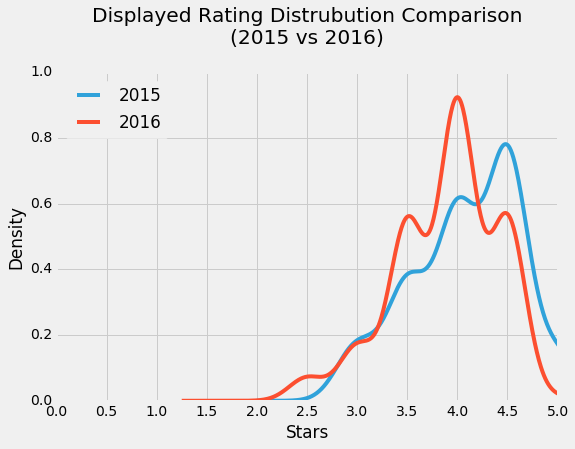

In [11]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

fand_2015['Fandango_Stars'].plot.kde(label='2015', legend=True, figsize=(8, 5.5))
fand_2016['fandango'].plot.kde(label='2016', legend=True)

plt.title(
    'Displayed Rating Distrubution Comparison\n(2015 vs 2016)',
    y=1.07
)

plt.xlabel('Stars')
plt.xlim(0, 5)
plt.xticks(arange(0, 5.5, .5))
plt.show()

## Observations

Both distributions are left-skewed, but, as mentioned earlier, the distribution from 2015 is even more left-skewed than it should have been. They are similar in that they spike every 0.5 stars, since the data only includes ratings quantized at every half star.

We know that 2015 had exagerated ratings, and 2016 has lower displayed ratings on average than 2015. We can compare our 2016 data with the *actual* rating from 2015, and see if they overlap.

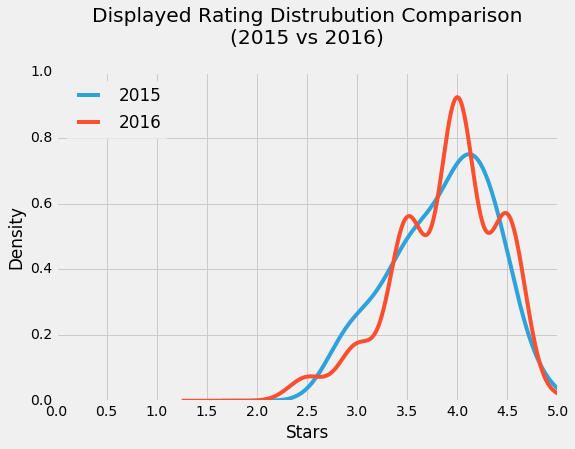

In [12]:
fand_2015['Fandango_Ratingvalue'].plot.kde(label='2015', legend=True, figsize=(8, 5.5))
fand_2016['fandango'].plot.kde(label='2016', legend=True)

plt.title(
    'Displayed Rating Distrubution Comparison\n(2015 vs 2016)',
    y=1.07
)

plt.xlabel('Stars')
plt.xlim(0, 5)
plt.xticks(arange(0, 5.5, .5))
plt.show()

The distributions don't look exactly the same, but that is in part because the actual ratings from 2015 aren't quantized to every half star. The distributions appear to be equally left-skewed, so it is a good tentative conclusion to make that Fandango fixed their bug, assuming movies in 2015 were of similar ratability as movies in 2016.

# Comparing Relative Frequencies

Lets analyze more finely using frequency tables

In [13]:
fand_2015['Fandango_Stars'].value_counts(normalize=True).sort_index() * 100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [14]:
fand_2016['fandango'].value_counts(normalize=True).sort_index() * 100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64


In 2016, very high ratings (4.5 and 5 stars) had significantly lower percentages compared to 2015. In 2016, under 1% of the movies had a perfect rating of 5 stars, compared to 2015 when the percentage was close to 7%. Ratings of 4.5 were also more popular in 2015 — there were approximately 13% more movies rated with a 4.5 in 2015 compared to 2016.

The minimum rating is also lower in 2016 — 2.5 instead of 3 stars, the minimum of 2015. There clearly is a difference between the two frequency distributions.

For some other ratings, the percentage went up in 2016. There was a greater percentage of movies in 2016 that received 3.5 and 4 stars, compared to 2015. 3.5 and 4.0 are high ratings and this challenges the direction of the change we saw on the kernel density plots.

# Determining the Direction of the Change

Let's take a couple of summary metrics to get a more precise picture about the direction of the change. In what follows, we'll compute the mean, the median, and the mode for both distributions and then use a bar graph to plot the values.

In [15]:

mean_2015 = fand_2015['Fandango_Stars'].mean()
mean_2016 = fand_2016['fandango'].mean()

median_2015 = fand_2015['Fandango_Stars'].median()
median_2016 = fand_2016['fandango'].median()

mode_2015 = fand_2015['Fandango_Stars'].mode()[0] # the output of Series.mode() is a bit uncommon
mode_2016 = fand_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


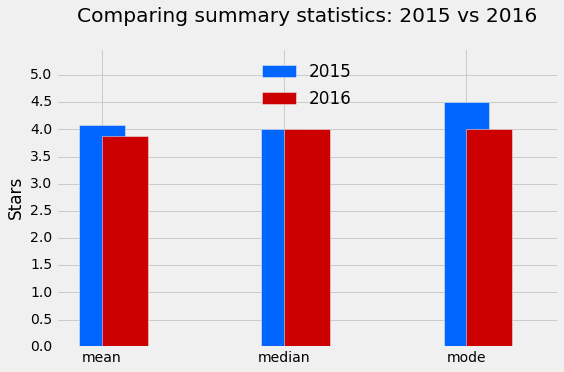

In [16]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

The mean rating was lower in 2016 with approximately 0.2. This means a drop of almost 5% relative to the mean rating in 2015.

In [17]:
(summary.loc['mean'][0] - summary.loc['mean'][1]) / summary.loc['mean'][0]

0.04842683568951993

While the median is the same for both distributions, the mode is lower in 2016 by 0.5. Coupled with what we saw for the mean, the direction of the change we saw on the kernel density plot is confirmed: on average, popular movies released in 2016 were rated slightly lower than popular movies released in 2015.

# Conclusion

Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.

We cannot be completely sure what caused the change, but the chances are very high that it was caused by Fandango fixing the biased rating system after Hickey's analysis.